# C02 Analysis

Machine learning on the C02 (Antihypersensitives) dataset extracted from main gctx

## Importing Basic Info

In [3]:
import pandas as pd
import numpy as np
from cmapPy.pandasGEXpress.parse import parse
from collections import Counter

Importing gene info (for analysis on specific genes such as top # varying or landmark genes)

In [4]:
gene_info = pd.read_csv("geneinfo_beta.txt", sep = "\t", dtype = str)
gene_info

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
0,750,GAS8-AS1,ENSG00000221819,GAS8 antisense RNA 1,ncRNA,NCBI,inferred
1,6315,ATXN8OS,NaN,ATXN8 opposite strand lncRNA,ncRNA,NCBI,inferred
2,7503,XIST,ENSG00000229807,X inactive specific transcript,ncRNA,NCBI,inferred
3,8552,INE1,ENSG00000224975,inactivation escape 1,ncRNA,NCBI,inferred
4,9834,FAM30A,ENSG00000226777,family with sequence similarity 30 member A,ncRNA,NCBI,inferred
...,...,...,...,...,...,...,...
12323,100287932,TIMM23,ENSG00000265354,translocase of inner mitochondrial membrane 23,protein-coding,NCBI,best inferred
12324,100289678,ZNF783,ENSG00000204946,zinc finger family member 783,protein-coding,NCBI,best inferred
12325,100507436,MICA,ENSG00000204520,MHC class I polypeptide-related sequence A,protein-coding,NCBI,best inferred
12326,9142,TMEM257,ENSG00000221870,transmembrane protein 257,protein-coding,NCBI,best inferred


In [5]:
landmark_ids = gene_info["gene_id"][gene_info["feature_space"] == "landmark"]
landmark_ids

2154        16
2155        23
2156        25
2157        30
2158        39
         ...  
3127    200081
3128    200734
3129    256364
3130    375346
3131    388650
Name: gene_id, Length: 978, dtype: object

Importing parsed C02 data

In [6]:
C02_gctoo = parse("C02_gctoo.gctx", rid = landmark_ids)
C02_gctoo

Extracting info from gctx

In [7]:
df = C02_gctoo.data_df
df = df.T
df

rid,10007,1001,10013,10038,10046,10049,10051,10057,10058,10059,...,9918,9924,9926,9928,993,994,9943,9961,998,9988
cid,,,,,,,,,,,,,,,,,,,,,
CPC001_HA1E_24H:BRD-A58207013-001-01-2:10,-0.324510,-0.357709,0.012902,-0.491123,-1.446865,-2.968565,1.019903,-1.260823,0.795295,-0.605654,...,0.466416,0.662615,-0.661389,-0.281165,-0.439291,-0.439549,0.911635,-0.694051,-0.891605,0.324089
CPC001_HA1E_6H:BRD-A58207013-001-01-2:10,-0.344635,0.791657,0.391190,1.354532,-0.013518,-0.911228,0.005014,0.327819,-0.130020,0.832249,...,0.868339,-1.710499,0.694454,0.493270,1.687727,0.687272,-1.376137,-1.162387,0.349791,-0.635963
CPC001_HCC515_24H:BRD-A58207013-001-01-2:10,0.149783,-0.456590,-0.002583,0.127987,0.167174,0.418906,0.539831,-0.299480,-0.583175,-0.766087,...,-0.100554,-0.784099,-0.219593,0.836193,0.552511,1.209108,1.073709,-0.273773,1.566233,0.833043
CPC001_HCC515_6H:BRD-A58207013-001-01-2:10,0.590500,-0.083200,-0.577950,-3.437600,0.351950,-0.225200,0.261500,0.781250,-0.950800,-0.227500,...,0.131200,1.173100,1.094400,0.731300,0.586800,-0.699150,0.182300,0.239150,0.215250,0.089900
CPC001_PC3_24H:M19,-0.078289,-0.637591,0.194648,0.204324,-0.321066,-0.230955,0.649899,-1.196956,-0.077409,-2.216946,...,-0.587858,-0.554682,-0.384817,0.588907,0.226026,0.348304,-0.259474,-0.468287,0.502618,-0.260665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REP.B028_YAPC_24H:L02,0.126650,0.581750,-0.891750,0.783100,-0.190300,-0.050500,1.212450,0.252100,0.065550,0.557800,...,0.343650,-0.350200,0.099450,-4.516500,-0.561400,-0.089850,-0.395750,0.387250,0.246350,1.120050
REP.B028_YAPC_24H:L03,0.339250,0.577100,-0.789550,-0.286400,-0.392950,-4.504350,0.459650,4.882000,-0.676900,-0.868100,...,-1.204400,-0.906600,0.074350,0.735350,-0.992000,0.121000,-1.338900,-0.043000,0.432050,-2.320850
REP.B028_YAPC_24H:L04,0.820500,-0.553750,0.637600,0.359600,-0.072850,0.071850,0.872050,-0.258450,0.421800,-0.455500,...,-1.645600,-0.986700,-0.256450,-0.126550,-0.536300,0.294450,-0.408700,-0.225700,-2.592300,0.073800


In [8]:
df.shape

(4044, 978)

Top varying genes analysis

In [28]:
# var = df.var()
# topvar = var.nlargest(300)
# row_ids = pd.Series(topvar.index.values, index = topvar)

# row_ids
# C02_gctoo = parse("C:/Users/tp36t/Desktop/Research/L01_gctoo.gctx", rid = row_ids)


# df = C02_gctoo.data_df
# df = df.T
# print(df.shape)

5.695218     6696
5.131175     2920
5.126308     9053
5.032204     6616
4.684373     2770
            ...  
1.715510    10245
1.709190      501
1.707128     6676
1.706798     9143
1.703393    57192
Length: 300, dtype: object

Before preceeding, a method to generate a boolean vector of whether a specific sample is in the drug class of interest is required

## Reverse Dictionary

Step 1: sig_id_to_ATC function : returns list of ATC codes from list of sig_ids (helper function) 

Step 2: boolean_vector_generator function: used to generate a boolean vector to label whether each sample is in the drug class of interest (e.g. we are trying to investigate C02A Antiadrenergic agents, centrally acting; when we input the sig_ids of all C02 compounds, a list of 0/1 is returned corresponding to whether the ATC code for each drug is classfied as C02A) 

**Step 1: sig_id_to_ATC**

Importing required dictionaries and metadata

In [11]:
sig_info = pd.read_csv("siginfo_beta.txt", sep = "\t", dtype=str)
sig_info

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,sig_id,pert_type,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_ncs_exemplar
0,b17,NaN,100,ug/ml,100 ug/ml,336 h,336,h,N8,BRD-U44432129,...,MET001_N8_XH:BRD-U44432129:100:336,trt_cp,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0
1,b15,10,10,uM,10 uM,3 h,3,h,A549,BRD-K81418486,...,ABY001_A549_XH:BRD-K81418486:10:3,trt_cp,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0
2,b15,2.5,2.5,uM,2.5 uM,24 h,24,h,HT29,BRD-K70511574,...,ABY001_HT29_XH:BRD-K70511574:2.5:24,trt_cp,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0
3,b18,10,10,uM,10 uM,3 h,3,h,HME1,BRD-K81418486,...,LTC002_HME1_3H:BRD-K81418486:10,trt_cp,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0
4,b15,10,10,uM,10 uM,3 h,3,h,H1975,BRD-A61304759,...,ABY001_H1975_XH:BRD-A61304759:10:3,trt_cp,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202651,b18,10,10,uM,10 uM,24 h,24,h,HCC515,BRD-K48853221,...,DOSVAL001_HCC515_24H:BRD-K48853221:10,trt_cp,HCC515,K01,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:K01|DOSVAL001_HCC5...,NaN,DOSVAL,BRD-K48853221,1
1202652,b18,10,10,uM,10 uM,24 h,24,h,HCC515,BRD-K90382497,...,DOSVAL001_HCC515_24H:BRD-K90382497:10,trt_cp,HCC515,O03,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:O03|DOSVAL001_HCC5...,NaN,DOSVAL,GW-843682X,0
1202653,b19,20,20,uM,20 uM,24 h,24,h,HCC515,BRD-K45785972,...,DOSVAL002_HCC515_24H:BRD-K45785972:20,trt_cp,HCC515,M22,DOSVAL002_HCC515_24H_X1.L2_B19|DOSVAL002_HCC51...,DOSVAL002_HCC515_24H_X1.L2_B19:M22|DOSVAL002_H...,NaN,DOSVAL,BRD-K45785972,0
1202654,b19,4,5,uM,4 uM,24 h,24,h,A375,BRD-K28513938,...,DOSVAL004_A375_24H:BRD-K28513938:5,trt_cp,A375,E09,DOSVAL004_A375_24H_X1.A2_B19|DOSVAL004_A375_24...,DOSVAL004_A375_24H_X1.A2_B19:E09|DOSVAL004_A37...,NaN,DOSVAL,BRD-K28513938,0


In [12]:
dictionary = pd.read_csv("../Dictionaries/ATC_to_pert_id_dictionary.txt") # From ATC Dictionary
dictionary

,Unnamed: 0,ATC_Code,cids,Compound_Name,inchi_key,pert_id
0,0,N05AX17,10071196,Pimavanserin,RKEWSXXUOLRFBX-UHFFFAOYSA-N,BRD-K83405785
1,1,L01EX06,10074640,Masitinib,WJEOLQLKVOPQFV-UHFFFAOYSA-N,BRD-K71035033
2,2,B01AC26,10077130,Vorapaxar,ZBGXUVOIWDMMJE-QHNZEKIYSA-N,BRD-K93442924
3,3,A10BH05,10096344,Linagliptin,LTXREWYXXSTFRX-QGZVFWFLSA-N,BRD-K96550715
4,4,L01EX03,10113978,Pazopanib,CUIHSIWYWATEQL-UHFFFAOYSA-N,BRD-K74514084
...,...,...,...,...,...,...
1413,1413,L01EK02,9933475,Cediranib,XXJWYDDUDKYVKI-UHFFFAOYSA-N,BRD-K86930074
1414,1414,H01CB05,9941444,Pasireotide,VMZMNAABQBOLAK-DBILLSOUSA-N,BRD-K59715032
1415,1415,L01XX53,9952884,Vosaroxin,XZAFZXJXZHRNAQ-STQMWFEESA-N,BRD-K23677682
1416,1416,N06AX26,9966051,Vortioxetine,YQNWZWMKLDQSAC-UHFFFAOYSA-N,BRD-K53963539


In [13]:
def sig_id_to_ATC(sig_id):
     pert_id = sig_info.loc[sig_info["sig_id"] == sig_id, "pert_id"].values[0]
     ATC = dictionary.loc[dictionary.pert_id == pert_id, "ATC_Code"].values[0]
     return ATC

Testing sig_id_to_ATC

In [14]:
sig_id_to_ATC("CPC001_PC3_24H:M19").startswith("C02")

True

**Step 2: boolean_vector_generator**

In [15]:
def boolean_vector_generator(ATC_Code):
    sig_ids = df.index.values
    is_of_interest = []
    for id in sig_ids:
        if sig_id_to_ATC(id).startswith(ATC_Code):
            is_of_interest.append(1)
        else:
            is_of_interest.append(0)
    is_of_interest_array = np.array(is_of_interest)
    return is_of_interest_array

In [16]:
is_of_interest_array = boolean_vector_generator("C02A")
is_of_interest_array

array([0, 0, 0, ..., 1, 1, 1])

Saving array

In [17]:
np.savetxt("antiadrenergics.csv", is_of_interest_array, fmt = "%d", delimiter=",") #Saving array for C02A so boolean_vector_generator doesn't have to run every time

Loading array

In [9]:
is_of_interest_array = np.loadtxt("antiadrenergics.csv", delimiter = ",")
is_of_interest_array

array([0., 0., 0., ..., 1., 1., 1.])

## Supervised ML

In [10]:
X = df.values # Gene expression data for different perturbagens
y = is_of_interest_array.astype(int) # Boolean array of whether drug is in ATC subclass 

Splitting data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test

(array([[ 0.4573    , -0.18809998,  0.36885   , ...,  0.513     ,
          1.1237    , -0.8658    ],
        [-0.10145   ,  1.6487999 , -0.98525   , ..., -0.51825   ,
          0.        , -0.78760004],
        [-0.80845   , -0.32165   , -0.2533    , ..., -0.1545    ,
         -0.7368    ,  0.0731    ],
        ...,
        [-0.83765   ,  0.12354998, -0.37255   , ..., -0.79755   ,
         -0.07975   , -0.19955   ],
        [-0.01982212, -0.97243893, -0.2049326 , ..., -1.5803678 ,
          0.18252309,  0.5266813 ],
        [ 1.20185   ,  0.6108    , -0.44505   , ..., -0.15000004,
          0.624     , -0.12574999]], dtype=float32),
 array([[ 0.7430216 ,  0.34294564, -1.2703934 , ...,  0.24536574,
          1.2261188 ,  0.5547682 ],
        [-0.17853758, -0.22298993, -0.4316274 , ..., -0.31941646,
         -0.46697408, -0.26003966],
        [-0.05020554, -0.15641898, -0.9653807 , ...,  0.23177852,
          0.5007307 , -0.3103863 ],
        ...,
        [-0.15930003,  0.1115    ,  0.0

**Imbalanced Learn**

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

oversample = SMOTE()
undersample = RandomUnderSampler()
sme = SMOTETomek(random_state=0)

In [13]:
counter = Counter(y_train) # Create a counter to identify number of drugs within subclass in training set
counter

Counter({1: 1083, 0: 2152})

In [14]:
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = undersample.fit_resample(X_train, y_train)
counter = Counter(y_train) # Create a counter to identify number of drugs within subclass in training set after balancing data
counter

Counter({0: 2152, 1: 2152})

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Random Forest Classification**

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state=0, class_weight = "balanced") # class_weight can be balanced using sklearn's built in balancing algorithm 
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

rf_probs = rf_classifier.predict_proba(X_test)
rf_probs = rf_probs[:, 1]


[[472  61]
 [207  69]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       533
           1       0.53      0.25      0.34       276

    accuracy                           0.67       809
   macro avg       0.61      0.57      0.56       809
weighted avg       0.64      0.67      0.63       809

0.6687268232385661


**SVM Model**

In [20]:
from sklearn.svm import SVC
svc_classifier = SVC(gamma="auto", probability=True)
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

svm_probs = svc_classifier.predict_proba(X_test)
svm_probs = svm_probs[:, 1]

[[475  58]
 [175 101]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       533
           1       0.64      0.37      0.46       276

    accuracy                           0.71       809
   macro avg       0.68      0.63      0.63       809
weighted avg       0.70      0.71      0.69       809

0.7119901112484549


**Adaboost Model**

In [65]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model = adaboost_classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

adaboost_probs = adaboost_classifier.predict_proba(X_test)
adaboost_probs= adaboost_probs[:, 1]

[[376 157]
 [137 139]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       533
           1       0.47      0.50      0.49       276

    accuracy                           0.64       809
   macro avg       0.60      0.60      0.60       809
weighted avg       0.64      0.64      0.64       809

0.6365883807169345


**Logistic Regression Model**

In [66]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(penalty = "l1", solver = "saga", multi_class = "ovr", max_iter = 2000, class_weight= "balanced")
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

lr_probs = lr_classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

[[378 155]
 [124 152]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       533
           1       0.50      0.55      0.52       276

    accuracy                           0.66       809
   macro avg       0.62      0.63      0.63       809
weighted avg       0.67      0.66      0.66       809

0.6551297898640297


**Balanced Random Forest Model**

In [67]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_classifier = BalancedRandomForestClassifier(random_state= 0)
brf_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

brf_probs = brf_classifier.predict_proba(X_test)
brf_probs = brf_probs[:, 1]

[[378 155]
 [124 152]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       533
           1       0.50      0.55      0.52       276

    accuracy                           0.66       809
   macro avg       0.62      0.63      0.63       809
weighted avg       0.67      0.66      0.66       809

0.6551297898640297


**XGBoost**

In [25]:
import xgboost as xgb

xgb_train = xgb.DMatrix(X_train, label = y_train)
xgb_test = xgb.DMatrix(X_test, label = y_test)

param = {
    "max_depth" : 5,
    "eta" : 0.2,
    "objective" : "multi:softmax",
    "num_class" : 2  
    }

epochs = 500

xgb_model = xgb.train(param, xgb_train, epochs)
y_pred = xgb_model.predict(xgb_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[13:07:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[454  79]
 [164 112]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       533
           1       0.59      0.41      0.48       276

    accuracy                           0.70       809
   macro avg       0.66      0.63      0.63       809
weighted avg       0.68      0.70      0.68       809

0.6996291718170581


.76 .5

**tpot**

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=50, population_size=100, verbosity=2, random_state=42, early_stop = 10)
tpot.fit(X_train, y_train)
y_pred = tpot.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

tpot_probs = tpot.predict_proba(X_test)
tpot_probs = tpot_probs[:, 1]

## Supervised ML Results Analysis

**Processing and creating ROC curves**

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
#r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
brf_auc = roc_auc_score(y_test, brf_probs)

In [70]:
# r_fpr, r_tpr = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
brf_fpr, brf_tpr, _ = roc_curve(y_test, brf_probs)

Graphing ROC curves

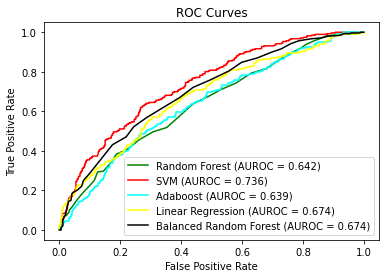

In [72]:
import matplotlib.pyplot as plt

plt.plot(rf_fpr, rf_tpr, color = "green", label = "Random Forest (AUROC = %0.3f)" %rf_auc)
plt.plot(svm_fpr, svm_tpr, color = "red", label = "SVM (AUROC = %0.3f)" %svm_auc)
plt.plot(adaboost_fpr, adaboost_tpr, color = "cyan", label = "Adaboost (AUROC = %0.3f)" %adaboost_auc)
plt.plot(lr_fpr, lr_tpr, color = "yellow", label = "Linear Regression (AUROC = %0.3f)" %lr_auc)
plt.plot(brf_fpr, brf_tpr, color = "black", label = "Balanced Random Forest (AUROC = %0.3f)" %lr_auc)


plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Unsupervised ML

KMeans Clustering

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)


from sklearn.metrics.cluster import adjusted_mutual_info_score
print("adjusted_mutual_info_score = " + str(adjusted_mutual_info_score(y_test,y_pred)))

from sklearn.metrics.cluster import homogeneity_score
print("homogeneity_score = " + str(homogeneity_score(y_test,y_pred)))

from sklearn.metrics.cluster import normalized_mutual_info_score
print("normalized_mutual_info_score = " + str(normalized_mutual_info_score(y_test,y_pred)))

from sklearn.metrics.cluster import rand_score
print("rand_score = " + str(rand_score(y_test,y_pred)))

adjusted_mutual_info_score = 0.00555831047572696
homogeneity_score = 0.006425300099760661
normalized_mutual_info_score = 0.006534812210294795
rand_score = 0.5002141746931182


Agglomerative Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering()
y_pred = agg_clustering.fit_predict(X)


print("adjusted_mutual_info_score = " + str(adjusted_mutual_info_score(y,y_pred)))

print("homogeneity_score = " + str(homogeneity_score(y,y_pred)))

print("normalized_mutual_info_score = " + str(normalized_mutual_info_score(y,y_pred)))

print("rand_score = " + str(rand_score(y, y_pred)))

adjusted_mutual_info_score = 0.02892620101437198
homogeneity_score = 0.018672013260440042
normalized_mutual_info_score = 0.0292215299010049
rand_score = 0.5308256470440295


DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
y_pred = dbscan.fit_predict(X)


print("adjusted_mutual_info_score = " + str(adjusted_mutual_info_score(y,y_pred)))

print("homogeneity_score = " + str(homogeneity_score(y,y_pred)))

print("normalized_mutual_info_score = " + str(normalized_mutual_info_score(y,y_pred)))

print("rand_score = " + str(rand_score(y, y_pred)))

adjusted_mutual_info_score = 0.0
homogeneity_score = 0.0
normalized_mutual_info_score = 0.0
rand_score = 0.5536465928949256
